<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/). 

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. The tidymodels packages can be used to produce high quality statistical and machine learning models. Our Jupyter notebook platforms have a built-in Tidyverse, Tidymodels and rlang packages so we do not need to install these packages prior to loading library. However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented lines of code to install these packages before loading.
 


In [2]:
# Install tidymodels if you haven't done so
# install.packages(c("tidyverse","tidymodels","rlang", "readr"))
# library()
install.packages("R.utils")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [3]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)


── Attaching packages ────────────────────────────────────── tidymodels 0.1.0 ──
✔ broom     0.5.6      ✔ recipes   0.1.12
✔ dials     0.0.6      ✔ rsample   0.0.5 
✔ dplyr     0.8.5      ✔ tibble    3.0.1 
✔ ggplot2   3.3.0      ✔ tune      0.1.0 
✔ infer     0.5.1      ✔ workflows 0.1.1 
✔ parsnip   0.1.0      ✔ yardstick 0.0.6 
✔ purrr     0.3.4      
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks dials::margin()
✖ recipes::step()   masks stats::step()
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ stringr 1.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter


### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure). 

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html) 

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [4]:
url <- 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'
download.file(url, destfile = "noaa-weather-sample-data.gz", overwrite = TRUE)

#if (file.exists("noaa-weather-sample-data")) {
#  unlink("noaa-weather-sample-data", recursive = TRUE)
#}
cat(list.files(), sep = "\n")

IBM-DS-with-R-2-Data-Analysis-with-R.ipynb
lax_to_jfk
lax_to_jfk.tar.gz
noaa-weather-sample-data
noaa-weather-sample-data.gz
noaa-weather-sample-data.tar


In [5]:
R.utils::gunzip("noaa-weather-sample-data.gz", destname = "noaa-weather-sample-data.tar", overwrite = TRUE)
cat(list.files(), sep = "\n")


IBM-DS-with-R-2-Data-Analysis-with-R.ipynb
lax_to_jfk
lax_to_jfk.tar.gz
noaa-weather-sample-data
noaa-weather-sample-data.tar


In [6]:
untar("noaa-weather-sample-data.tar", exdir = "noaa-weather-sample-data", tar = "internal")


Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

In [7]:
cat("Files after untar:\n", list.files("noaa-weather-sample-data", recursive = TRUE), sep = "\n")

cat(list.files(), sep = "\n")
list.files(path = "noaa-weather-sample-data", recursive = TRUE)

Files after untar:

noaa-weather-sample-data/jfk_weather_sample.csv
noaa-weather-sample-data/LICENSE.txt
noaa-weather-sample-data/README.txt
IBM-DS-with-R-2-Data-Analysis-with-R.ipynb
lax_to_jfk
lax_to_jfk.tar.gz
noaa-weather-sample-data
noaa-weather-sample-data.tar


[1] "noaa-weather-sample-data/jfk_weather_sample.csv"
[2] "noaa-weather-sample-data/LICENSE.txt"           
[3] "noaa-weather-sample-data/README.txt"

In [8]:
list.files(path = "/resources/DA0151EN/labs/Final_project", recursive = TRUE, full.names = TRUE)


[1] "/resources/DA0151EN/labs/Final_project/IBM-DS-with-R-2-Data-Analysis-with-R.ipynb"                              
[2] "/resources/DA0151EN/labs/Final_project/lax_to_jfk.tar.gz"                                                       
[3] "/resources/DA0151EN/labs/Final_project/lax_to_jfk/lax_to_jfk.csv"                                               
[4] "/resources/DA0151EN/labs/Final_project/lax_to_jfk/LICENSE.txt"                                                  
[5] "/resources/DA0151EN/labs/Final_project/noaa-weather-sample-data.tar"                                            
[6] "/resources/DA0151EN/labs/Final_project/noaa-weather-sample-data/noaa-weather-sample-data/jfk_weather_sample.csv"
[7] "/resources/DA0151EN/labs/Final_project/noaa-weather-sample-data/noaa-weather-sample-data/LICENSE.txt"           
[8] "/resources/DA0151EN/labs/Final_project/noaa-weather-sample-data/noaa-weather-sample-data/README.txt"

<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [9]:
jfk_weather_sample <- read_csv("/resources/DA0151EN/labs/Final_project/noaa-weather-sample-data/noaa-weather-sample-data/jfk_weather_sample.csv")


Parsed with column specification:
cols(
  DATE = col_datetime(format = ""),
  HOURLYDewPointTempF = col_double(),
  HOURLYRelativeHumidity = col_double(),
  HOURLYDRYBULBTEMPF = col_double(),
  HOURLYWETBULBTEMPF = col_double(),
  HOURLYPrecip = col_character(),
  HOURLYWindSpeed = col_double(),
  HOURLYSeaLevelPressure = col_double(),
  HOURLYStationPressure = col_double()
)
Warning message:
“1 parsing failure.
 row                 col               expected actual                                                                                                              file
1443 HOURLYDewPointTempF no trailing characters      s '/resources/DA0151EN/labs/Final_project/noaa-weather-sample-data/noaa-weather-sample-data/jfk_weather_sample.csv'
”

Next, display the first few rows of the dataframe.


In [10]:
head(jfk_weather_sample, 10)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92
2014-03-01 02:51:00,4,51,19,15,0.00,0,30.42,30.40
2014-02-12 21:51:00,14,65,24,21,0.00,11,30.37,30.35
2014-10-11 09:51:00,51,90,54,52,0.06,11,30.05,30.03


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [11]:
glimpse(jfk_weather_sample)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 201…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19,…
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [12]:
hourly_data <- jfk_weather_sample %>% 
select(HOURLYRelativeHumidity, HOURLYDRYBULBTEMPF, HOURLYPrecip, HOURLYWindSpeed, HOURLYStationPressure)


Show the first 10 rows of this new dataframe.


In [13]:
head(hourly_data,10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [14]:
# unique(hourly_data$HOURLYPrecip)
# running the `unique` command above shows us that there are still some "NA" values, so we have to run this additional command:
hourly_data <- na.omit(hourly_data) # Remove rows with missing values from any variable
# now we run it again...
unique(hourly_data$HOURLYPrecip) #... and we see the "NA"s are gone

[1] "0.00"  "T"     "0.06"  "0.03"  "0.02"  "0.08"  "0.01"  "0.07"  "0.16" 
[10] "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s" "0.11" 
[19] "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46"  "1.07" 
[28] "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35"  "0.31" 
[37] "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s" "0.07s"
[46] "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters. 

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and 
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [15]:
hourly_data <- hourly_data %>%
  mutate(
    HOURLYPrecip = str_remove(HOURLYPrecip, "s$"),  # Remove trailing 's'
    HOURLYPrecip = str_replace(HOURLYPrecip, "^T$", "0.0")  # Replace 'T' with '0.0'
  )

In [16]:
unique(hourly_data$HOURLYPrecip)

[1] "0.00" "0.0"  "0.06" "0.03" "0.02" "0.08" "0.01" "0.07" "0.16" "0.09"
[11] "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10" "0.58"
[21] "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42" "0.17"
[31] "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19" "0.54"
[41] "0.59" "0.21"

<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [17]:
glimpse(hourly_data)

Rows: 4,063
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0.0", "0.00",…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [18]:
hourly_data <- hourly_data %>%
  mutate(HOURLYPrecip = as.numeric(HOURLYPrecip))

We can now see that all fields have numerical data type.


In [19]:
glimpse(hourly_data)

Rows: 4,063
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [20]:
hourly_data <- dplyr::rename(hourly_data, relative_humidity = HOURLYRelativeHumidity, dry_bulb_temp_f = HOURLYDRYBULBTEMPF, precip = HOURLYPrecip, wind_speed = HOURLYWindSpeed, station_pressure = HOURLYStationPressure)

<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [21]:
library(rsample)
set.seed(1234)

split <- initial_split(hourly_data, prop = 0.8)
training_data <- training(split)
testing_data <- testing(split)

head(training_data)
head(testing_data)

relative_humidity,dry_bulb_temp_f,precip,wind_speed,station_pressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,36,0.00,14,29.80
61,39,0.00,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
90,54,0.06,11,30.03


relative_humidity,dry_bulb_temp_f,precip,wind_speed,station_pressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,53,0,6,30.03
89,36,0,13,30.12
65,24,0,11,30.35
47,78,0,8,30.16
84,75,0,3,30.17
57,37,0,11,30.01


Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


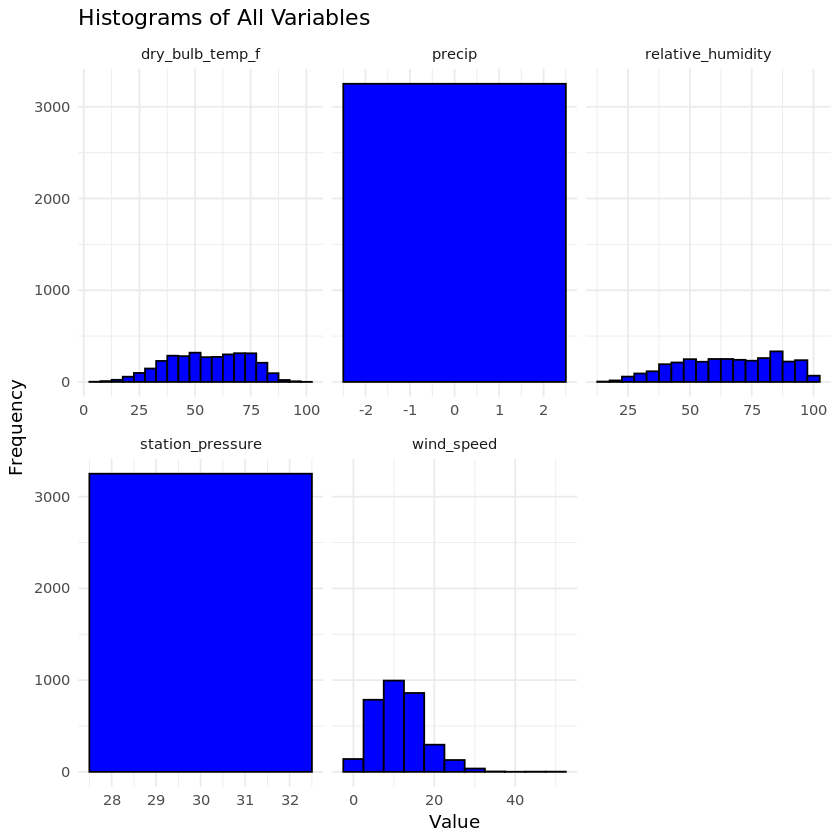

In [22]:
# Reshape the entire dataframe to long format
long_data <- training_data %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value")

# Generate faceted histograms for all variables
ggplot(long_data, aes(x = Value)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  facet_wrap(~ Variable, scales = "free_x") +
  labs(
    title = "Histograms of All Variables",
    x = "Value",
    y = "Frequency"
  ) +
  theme_minimal()

<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.


parsnip model object

Fit time:  5ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
      (Intercept)  relative_humidity  
       -0.0208240          0.0004175  


`geom_smooth()` using formula 'y ~ x'


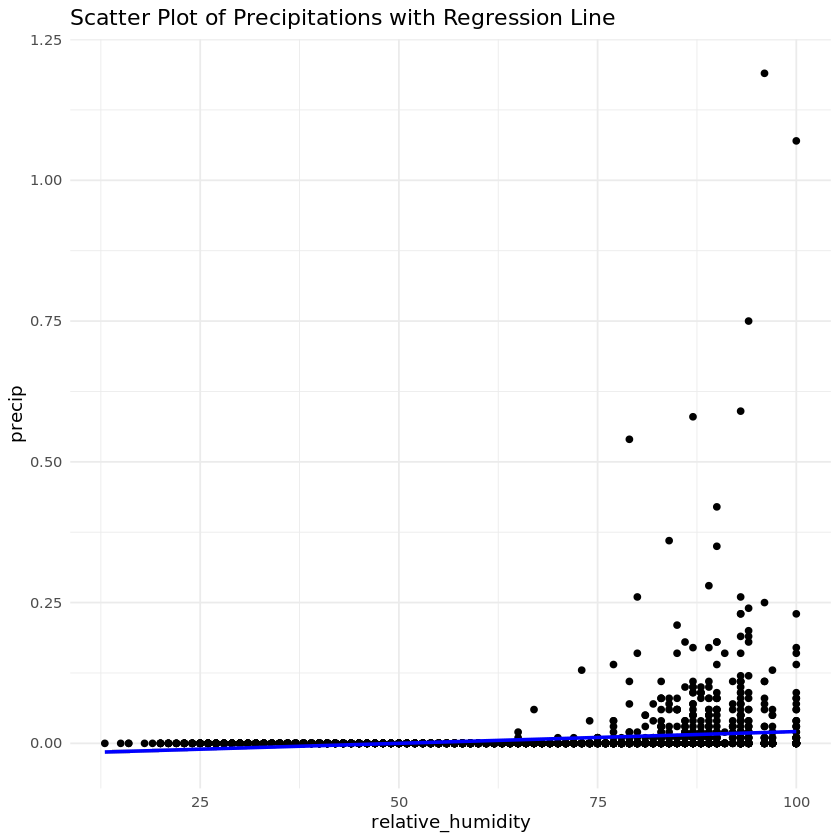

In [23]:
# precip ~ relative_humidity
# Pick linear regression
lm_spec <- linear_reg() %>%
    set_engine(engine = "lm")

training_rel_hum <- lm_spec %>% 
    fit(precip ~ relative_humidity, data = training_data)
training_rel_hum

ggplot(training_data, aes(x = relative_humidity, y = precip)) +
  geom_point() +  # Add scatter points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line
  labs(
    title = "Scatter Plot of Precipitations with Regression Line",
    x = "relative_humidity",
    y = "precip"
  ) +
  theme_minimal()

# we also define this model with the testing data
testing_rel_hum <- lm_spec %>% 
    fit(precip ~ relative_humidity, data = testing_data)

parsnip model object

Fit time:  3ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
    (Intercept)  dry_bulb_temp_f  
       0.004313         0.000043  


`geom_smooth()` using formula 'y ~ x'


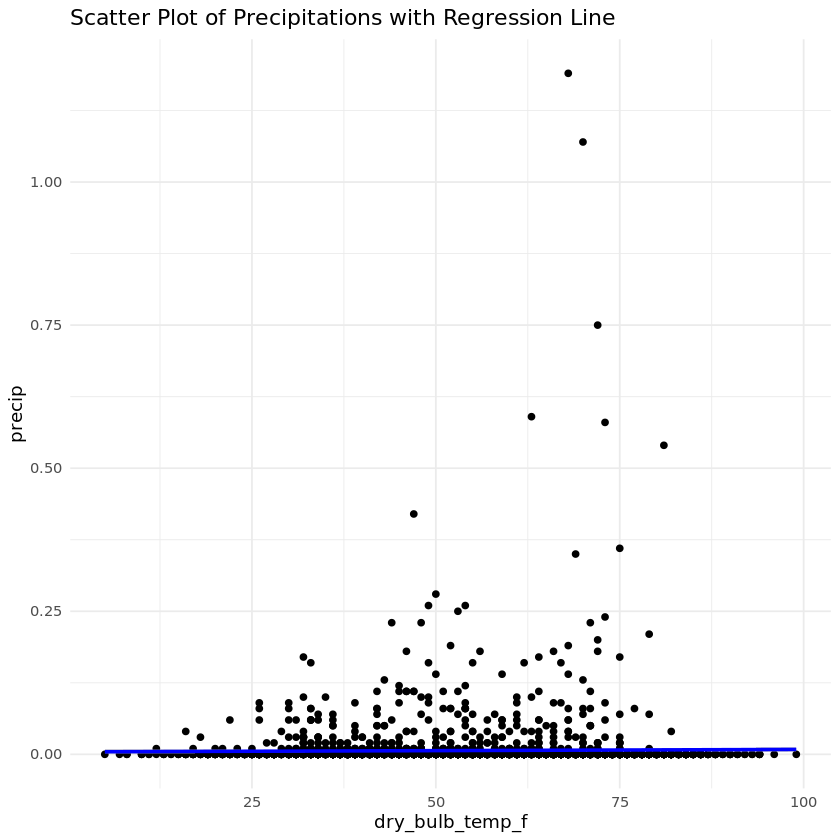

In [24]:
# precip ~ dry_bulb_temp_f
training_dry_temp <- lm_spec %>% 
    fit(precip ~ dry_bulb_temp_f, data = training_data)
training_dry_temp

ggplot(training_data, aes(x = dry_bulb_temp_f, y = precip)) +
  geom_point() +  # Add scatter points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line
  labs(
    title = "Scatter Plot of Precipitations with Regression Line",
    x = "dry_bulb_temp_f",
    y = "precip"
  ) +
  theme_minimal()

# we also define this model with the testing data
testing_dry_temp <- lm_spec %>% 
    fit(precip ~ dry_bulb_temp_f, data = testing_data)

parsnip model object

Fit time:  5ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
(Intercept)   wind_speed  
  0.0006257    0.0005342  


`geom_smooth()` using formula 'y ~ x'


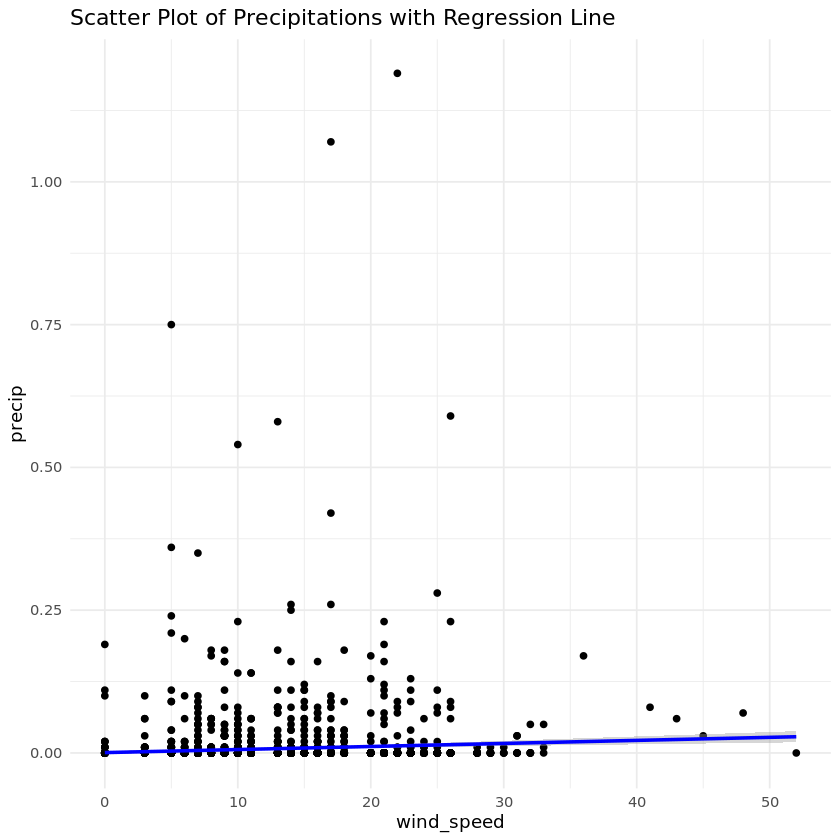

In [25]:
# precip ~ wind_speed
training_wind_speed <- lm_spec %>% 
    fit(precip ~ wind_speed, data = training_data)
training_wind_speed

ggplot(training_data, aes(x = wind_speed, y = precip)) +
  geom_point() +  # Add scatter points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line
  labs(
    title = "Scatter Plot of Precipitations with Regression Line",
    x = "wind_speed",
    y = "precip"
  ) +
  theme_minimal()

# we also define this model with the testing data
testing_wind_speed <- lm_spec %>% 
    fit(precip ~ wind_speed, data = testing_data)

parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
     (Intercept)  station_pressure  
         0.70517          -0.02329  


`geom_smooth()` using formula 'y ~ x'


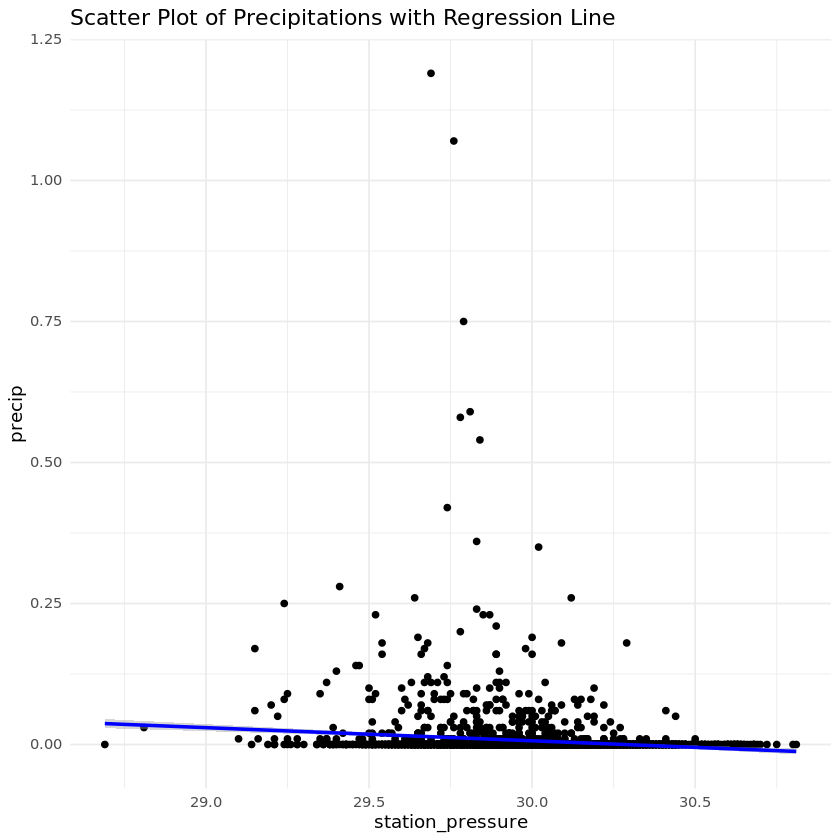

In [26]:
# precip ~ station_pressure

training_pressure <- lm_spec %>% 
    fit(precip ~ station_pressure, data = training_data)
training_pressure

ggplot(training_data, aes(x = station_pressure, y = precip)) +
  geom_point() +  # Add scatter points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line
  labs(
    title = "Scatter Plot of Precipitations with Regression Line",
    x = "station_pressure",
    y = "precip"
  ) +
  theme_minimal()


# we also define this model with the testing data
testing_pressure <- lm_spec %>% 
    fit(precip ~ station_pressure, data = testing_data)

<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section. 

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


In [27]:
# model precip on relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure
# looking at the data, it seems like a polynomial of degree 2 should capture the non-linear response of precip

training_rel_hum_w_2nd_order <- lm_spec %>% 
    fit(precip ~ relative_humidity + I(relative_humidity^2), data = training_data)
training_rel_hum_w_2nd_order

# this model uses all variables and the pressure - humidity cross-variable
training_all_vars <- lm_spec %>% 
    fit(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure + station_pressure:relative_humidity, data = training_data)
training_all_vars

# now let's calculate MSE, RMSE and R2 for a couple of the 1-variable models created so far (relative humidity and station pressure), 
# as well as the all variables model and the all variables model with 2nd order variables
# We use the training data:
# Generate predictions on the training data

pred_training_rel_hum <- predict(training_rel_hum, new_data = training_data)
pred_training_rel_hum_w_2nd_order <- predict(training_rel_hum_w_2nd_order, new_data = training_data)
pred_training_pressure <- predict(training_pressure, new_data = training_data)
pred_training_all_vars <- predict(training_all_vars, new_data = training_data)

# Add predictions to the training data
results_training_rel_hum <- training_data %>%
  mutate(
    .pred_rel_hum = pred_training_rel_hum$.pred,   # Predicted values
    residuals_rel_hum = precip - .pred_rel_hum   # Residuals
  )
results_training_rel_hum_w_2nd_order <- training_data %>%
  mutate(
    .pred_rel_hum_w_2nd_order = pred_training_rel_hum_w_2nd_order$.pred,
    residuals_rel_hum_w_2nd_order = precip - .pred_rel_hum_w_2nd_order
  )
results_training_pressure <- training_data %>%
  mutate(
    .pred_pressure = pred_training_pressure$.pred,
    residuals_pressure = precip - .pred_pressure
  )
results_training_all_vars <- training_data %>%
  mutate(
    .pred_all_vars = pred_training_all_vars$.pred,
    residuals_all_vars = precip - .pred_all_vars
  )

# Calculate MSE
mse_training_rel_hum <- mean(results_training_rel_hum$residuals_rel_hum^2)
mse_training_rel_hum_w_2nd_order <- mean(results_training_rel_hum_w_2nd_order$residuals_rel_hum_w_2nd_order^2)
mse_training_pressure <- mean(results_training_pressure$residuals_pressure^2)
mse_training_all_vars <- mean(results_training_all_vars$residuals_all_vars^2)

# Calculate RMSE
rmse_training_rel_hum <- sqrt(mse_training_rel_hum)
rmse_training_rel_hum_w_2nd_order <- sqrt(mse_training_rel_hum_w_2nd_order)
rmse_training_pressure <- sqrt(mse_training_pressure)
rmse_training_all_vars <- sqrt(mse_training_all_vars)

# Calculate R-squared
ss_total_training_rel_hum <- sum((training_data$precip - mean(training_data$precip))^2)
ss_residual_training_rel_hum <- sum(results_training_rel_hum$residuals_rel_hum^2)
r_squared_training_rel_hum <- 1 - (ss_residual_training_rel_hum / ss_total_training_rel_hum)

ss_total_training_rel_hum_w_2nd_order <- sum((training_data$precip - mean(training_data$precip))^2)
ss_residual_training_rel_hum_w_2nd_order <- sum(results_training_rel_hum_w_2nd_order$residuals_rel_hum_w_2nd_order^2)
r_squared_training_rel_hum_w_2nd_order <- 1 - (ss_residual_training_rel_hum_w_2nd_order / ss_total_training_rel_hum_w_2nd_order)

ss_total_training_pressure <- sum((training_data$precip - mean(training_data$precip))^2)
ss_residual_training_pressure <- sum(results_training_pressure$residuals_pressure^2)
r_squared_training_pressure <- 1 - (ss_residual_training_pressure / ss_total_training_pressure)

ss_total_training_all_vars <- sum((training_data$precip - mean(training_data$precip))^2)
ss_residual_training_all_vars <- sum(results_training_all_vars$residuals_all_vars^2)
r_squared_training_all_vars <- 1 - (ss_residual_training_all_vars / ss_total_training_all_vars)

# Output results
cat('Relative Humidity model performance', '\n')
cat('MSE:', mse_training_rel_hum, '\n')
cat('RMSE:', rmse_training_rel_hum, '\n')
cat('R-squared:', r_squared_training_rel_hum, '\n')
cat('===========','\n')
cat('Relative Humidity with Second Order Term model performance', '\n')
cat('MSE:', mse_training_rel_hum_w_2nd_order, '\n')
cat('RMSE:', rmse_training_rel_hum_w_2nd_order, '\n')
cat('R-squared:', r_squared_training_rel_hum_w_2nd_order, '\n')
cat('===========','\n')
cat('Pressure model performance', '\n')
cat('MSE:', mse_training_pressure, '\n')
cat('RMSE:', rmse_training_pressure, '\n')
cat('R-squared:', r_squared_training_pressure, '\n')
cat('===========','\n')
cat('All Variables model performance', '\n')
cat('MSE:', mse_training_all_vars, '\n')
cat('RMSE:', rmse_training_all_vars, '\n')
cat('R-squared:', r_squared_training_all_vars, '\n')
cat('===========','\n')

parsnip model object

Fit time:  3ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
           (Intercept)       relative_humidity  I(relative_humidity^2)  
             3.635e-02              -1.574e-03               1.563e-05  


parsnip model object

Fit time:  3ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
                       (Intercept)                   relative_humidity  
                        -1.868e+00                           3.165e-02  
                   dry_bulb_temp_f                          wind_speed  
                         6.404e-05                           7.607e-04  
                  station_pressure  relative_humidity:station_pressure  
                         6.110e-02                          -1.041e-03  


Relative Humidity model performance 
MSE: 0.001812124 
RMSE: 0.04256904 
R-squared: 0.03662046 
Relative Humidity with Second Order Term model performance 
MSE: 0.00177448 
RMSE: 0.04212458 
R-squared: 0.05663267 
Pressure model performance 
MSE: 0.001849334 
RMSE: 0.04300388 
R-squared: 0.01683821 
All Variables model performance 
MSE: 0.001754973 
RMSE: 0.0418924 
R-squared: 0.06700315 


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [52]:
# now we run on test data two of the one-variable model, and the multi-variable models just above, using the testing data
# and the same metrics are being evaluated

testing_pressure <- lm_spec %>% 
    fit(precip ~ station_pressure, data = testing_data)
testing_pressure

testing_rel_hum <- lm_spec %>% 
    fit(precip ~ relative_humidity, data = testing_data)
testing_rel_hum

testing_rel_hum_w_2nd_order <- lm_spec %>% 
    fit(precip ~ relative_humidity + I(relative_humidity^2), data = testing_data)
testing_rel_hum_w_2nd_order

testing_all_vars <- lm_spec %>% 
    fit(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure + station_pressure:relative_humidity, data = testing_data)
testing_all_vars

# now let's calculate MSE, RMSE and R2 for the 4 models above, using the testing data

pred_testing_pressure <- predict(testing_pressure, new_data = testing_data)
pred_testing_rel_hum <- predict(testing_rel_hum, new_data = testing_data)
pred_testing_rel_hum_w_2nd_order <- predict(testing_rel_hum_w_2nd_order, new_data = testing_data)
pred_testing_pressure <- predict(testing_pressure, new_data = testing_data)
pred_testing_all_vars <- predict(testing_all_vars, new_data = testing_data)

# Add predictions to the testing data
results_testing_pressure <- testing_data %>%
  mutate(
    .pred_pressure = pred_testing_pressure$.pred,
    residuals_pressure = precip - .pred_pressure
  )
results_testing_rel_hum <- testing_data %>%
  mutate(
    .pred_rel_hum = pred_testing_rel_hum$.pred,
    residuals_rel_hum = precip - .pred_rel_hum
  )
results_testing_rel_hum_w_2nd_order <- testing_data %>%
  mutate(
    .pred_rel_hum_w_2nd_order = pred_testing_rel_hum_w_2nd_order$.pred,
    residuals_rel_hum_w_2nd_order = precip - .pred_rel_hum_w_2nd_order
  )
results_testing_all_vars <- testing_data %>%
  mutate(
    .pred_all_vars = pred_testing_all_vars$.pred,
    residuals_all_vars = precip - .pred_all_vars
  )

# Calculate MSE
mse_testing_pressure <- mean(results_testing_pressure$residuals_pressure^2)
mse_testing_rel_hum <- mean(results_testing_rel_hum$residuals_rel_hum^2)
mse_testing_rel_hum_w_2nd_order <- mean(results_testing_rel_hum_w_2nd_order$residuals_rel_hum_w_2nd_order^2)
mse_testing_all_vars <- mean(results_testing_all_vars$residuals_all_vars^2)

# Calculate RMSE
rmse_testing_pressure <- sqrt(mse_testing_pressure)
rmse_testing_rel_hum <- sqrt(mse_testing_rel_hum)
rmse_testing_rel_hum_w_2nd_order <- sqrt(mse_testing_rel_hum_w_2nd_order)
rmse_testing_all_vars <- sqrt(mse_testing_all_vars)

# Calculate R-squared
ss_total_testing_pressure <- sum((testing_data$precip - mean(testing_data$precip))^2)
ss_residual_testing_pressure <- sum(results_testing_pressure$residuals_pressure^2)
r_squared_testing_pressure <- 1 - (ss_residual_testing_pressure / ss_total_testing_pressure)

ss_total_testing_rel_hum <- sum((testing_data$precip - mean(testing_data$precip))^2)
ss_residual_testing_rel_hum <- sum(results_testing_rel_hum$residuals_rel_hum^2)
r_squared_testing_rel_hum <- 1 - (ss_residual_testing_rel_hum / ss_total_testing_rel_hum)

ss_total_testing_rel_hum_w_2nd_order <- sum((testing_data$precip - mean(testing_data$precip))^2)
ss_residual_testing_rel_hum_w_2nd_order <- sum(results_testing_rel_hum_w_2nd_order$residuals_rel_hum_w_2nd_order^2)
r_squared_testing_rel_hum_w_2nd_order <- 1 - (ss_residual_testing_rel_hum_w_2nd_order / ss_total_testing_rel_hum_w_2nd_order)

ss_total_testing_all_vars <- sum((testing_data$precip - mean(testing_data$precip))^2)
ss_residual_testing_all_vars <- sum(results_testing_all_vars$residuals_all_vars^2)
r_squared_testing_all_vars <- 1 - (ss_residual_testing_all_vars / ss_total_testing_all_vars)

# Output results
cat('Pressure model performance', '\n')
cat('MSE:', mse_testing_pressure, '\n')
cat('RMSE:', rmse_testing_pressure, '\n')
cat('R-squared:', r_squared_testing_pressure, '\n')
cat('===========','\n')
cat('Relative Humidity model performance', '\n')
cat('MSE:', mse_testing_rel_hum, '\n')
cat('RMSE:', rmse_testing_rel_hum, '\n')
cat('R-squared:', r_squared_testing_rel_hum, '\n')
cat('===========','\n')
cat('Relative Humidity with Second Order Term model performance', '\n')
cat('MSE:', mse_testing_rel_hum_w_2nd_order, '\n')
cat('RMSE:', rmse_testing_rel_hum_w_2nd_order, '\n')
cat('R-squared:', r_squared_testing_rel_hum_w_2nd_order, '\n')
cat('===========','\n')
cat('All Variables model performance', '\n')
cat('MSE:', mse_testing_all_vars, '\n')
cat('RMSE:', rmse_testing_all_vars, '\n')
cat('R-squared:', r_squared_testing_all_vars, '\n')
cat('===========','\n')

# sum(is.na(precip)) # Check for NAs in the response variable
# sum(is.na(training_data)) # Check for NAs in the entire training data



parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
     (Intercept)  station_pressure  
         0.71897          -0.02377  


parsnip model object

Fit time:  1ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
      (Intercept)  relative_humidity  
       -0.0189583          0.0003763  


parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
           (Intercept)       relative_humidity  I(relative_humidity^2)  
             0.0312819              -0.0013713               0.0000137  


parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
                       (Intercept)                   relative_humidity  
                        -1.670e+00                           3.157e-02  
                   dry_bulb_temp_f                          wind_speed  
                        -2.824e-05                           5.362e-04  
                  station_pressure  relative_humidity:station_pressure  
                         5.490e-02                          -1.040e-03  


Pressure model performance 
MSE: 0.001138544 
RMSE: 0.03374232 
R-squared: 0.02504218 
Relative Humidity model performance 
MSE: 0.001111929 
RMSE: 0.0333456 
R-squared: 0.04783295 
Relative Humidity with Second Order Term model performance 
MSE: 0.001080589 
RMSE: 0.03287231 
R-squared: 0.07467039 
All Variables model performance 
MSE: 0.001061339 
RMSE: 0.0325782 
R-squared: 0.09115421 


In [55]:
# 2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
model_names <- c("pressure", "relative humidty", "rel. hum. w/ 2nd order", "all variables")
train_error_R2 <- c(r_squared_training_pressure, r_squared_training_rel_hum, r_squared_training_rel_hum_w_2nd_order, r_squared_training_all_vars)
test_error_R2 <- c(r_squared_testing_pressure, r_squared_testing_rel_hum, r_squared_testing_rel_hum_w_2nd_order, r_squared_testing_all_vars)
comparison_df <- data.frame(model_names, train_error_R2, test_error_R2)

In [57]:
# conclude which model performed best

# Based on the R-squared calculated on both the training data and the testing data, the all variables model with all 4 variables
# (relative_humidity, dry_bulb_temp_f, ) and a cross-variable of station_pressure and relative_humidity 
# performs best, among the 4 models compared.


wind_speed
'HOURLYStationPressure' to 'station_pressure'

print(comparison_df)



             model_names train_error_R2 test_error_R2
1               pressure     0.01683821    0.02504218
2       relative humidty     0.03662046    0.04783295
3 rel. hum. w/ 2nd order     0.05663267    0.07467039
4          all variables     0.06700315    0.09115421


## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
